## Ethereum Data Preparation


In [143]:
import numpy as np
import pandas as pd
import hvplot.pandas
from datetime import datetime, date
from functools import reduce

In [144]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment 
#this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [146]:
# Load the fear and greed sentiment data for Bitcoin (only fear and greed index)
fng_df = pd.read_csv('fng.csv')
fng_df = fng_df.rename(columns={'date':'Date', 'value_classification':'fng_class'})
fng_df = fng_df.drop(columns=['value'])
mapping = {'Extreme Fear':'-1.0', 'Fear':'-0.5', 'Neutral':'0.0', 
        'Greed':'0.5', 'Extreme Greed':'1.0'}
fng_df['fng_class'] = fng_df['fng_class'].map(mapping)
fng_df['fng_class'] = pd.to_numeric(fng_df['fng_class'])
fng_df['fng_class'] = fng_df['fng_class'].astype(float)
fng_df.tail()

,Date,fng_class
715,2019-02-01,-1.0
716,2019-01-31,-1.0
717,2019-01-30,-1.0
718,2019-01-29,-1.0
719,2019-01-28,-0.5


In [147]:
fng_df.set_index(['Date'], inplace=True)
fng_df.tail()

,fng_class
Date,
2019-02-01,-1.0
2019-01-31,-1.0
2019-01-30,-1.0
2019-01-29,-1.0
2019-01-28,-0.5


In [148]:
# Load the vader sentiment data for Ethereum
eth_vader_df = pd.read_csv('eth_vader.csv', infer_datetime_format=True, parse_dates=True)
eth_vader_df["Publish Date"] = [date[0:10] for date in eth_vader_df["Publish Date"]]
eth_vader_df = eth_vader_df.drop(columns=["Post ID", "Title", "Url", "Author", "Score", "Total No. of Comments", "Permalink",
        "title_pos", "title_neu", "title_neg", "title_sent"], axis=1)
eth_vader_df.rename(columns = {'Publish Date':'Date', 'title_compound': 'vader_compound'}, inplace = True)
eth_vader_df['vader_compound'] = eth_vader_df['vader_compound'].astype(float).round(decimals=2)
eth_vader_df.head()

,Date,vader_compound
0,2019-01-24,0.20
1,2019-02-05,0.00
2,2019-02-06,-0.59
3,2019-02-13,0.00
4,2019-02-13,0.00


In [149]:
eth_vader_df.set_index(['Date'], inplace=True)
eth_vader_df.head()

,vader_compound
Date,
2019-01-24,0.20
2019-02-05,0.00
2019-02-06,-0.59
2019-02-13,0.00
2019-02-13,0.00


In [150]:
# Load the historical closing prices for Ethereum
eth_close_df = pd.read_csv('ethprices.csv')
eth_close_df = eth_close_df.sort_index()
eth_close_df = eth_close_df.rename(columns={'date':'Date', 'close':'close_price'})
eth_close_df = eth_close_df.drop(["symbol", "volume"], axis=1)
#eth_close_df['Close Price'] = pd.to_numeric(eth_close_df['Close Price'])
#eth_close_df['Close Price'] = eth_close_df['Close Price'].astype(int)
eth_close_df.head()

,Date,close_price
0,2019-01-28,105.43
1,2019-01-29,104.01
2,2019-01-30,107.50
3,2019-01-31,105.74
4,2019-02-01,105.69


In [151]:
eth_close_df.set_index(['Date'], inplace=True)
eth_close_df.head()

,close_price
Date,
2019-01-28,105.43
2019-01-29,104.01
2019-01-30,107.50
2019-01-31,105.74
2019-02-01,105.69


In [153]:
# Load the exponential weighted moving average data for Ethereum
eth_ewm_df = pd.read_csv('eth_ema.csv')
eth_ewm_df = eth_ewm_df.sort_index()
eth_ewm_df = eth_ewm_df.rename(columns={'date':'Date', 'crossover_signal':'ewm_cross_signal'})
eth_ewm_df = eth_ewm_df.drop(["symbol", "close", "volume", "daily_return", "fast_close", "slow_close", "crossover_long", "crossover_short"], axis=1)
eth_ewm_df['ewm_cross_signal'] = eth_ewm_df['ewm_cross_signal'].astype(float)
eth_ewm_df.head()

,Date,ewm_cross_signal
0,2019-01-28,0.0
1,2019-01-29,-1.0
2,2019-01-30,1.0
3,2019-01-31,1.0
4,2019-02-01,1.0


In [154]:
eth_ewm_df.set_index(['Date'], inplace=True)
eth_ewm_df.head()

,ewm_cross_signal
Date,
2019-01-28,0.0
2019-01-29,-1.0
2019-01-30,1.0
2019-01-31,1.0
2019-02-01,1.0


In [155]:
# Load the money flow index for Ethereum
eth_mfi_df = pd.read_csv('mfi_eth.csv')
eth_mfi_df = eth_mfi_df.sort_index()
eth_mfi_df = eth_mfi_df.rename(columns={'date':'Date'})
eth_mfi_df = eth_mfi_df.drop(["symbol", "close", "volume", "Buy", "Sell"], axis=1)
eth_mfi_df['MFI'] = eth_mfi_df['MFI'].round(decimals=2)
eth_mfi_df.head()

,Date,MFI
0,2019-02-11,39.15
1,2019-02-12,49.83
2,2019-02-13,43.22
3,2019-02-14,45.43
4,2019-02-15,53.56


In [156]:
eth_mfi_df.set_index(['Date'], inplace=True)
eth_mfi_df.head()

,MFI
Date,
2019-02-11,39.15
2019-02-12,49.83
2019-02-13,43.22
2019-02-14,45.43
2019-02-15,53.56


In [157]:
# Load the money flow index for Ethereum
eth_google_df = pd.read_csv('eth_google.csv')
eth_google_df = eth_google_df.sort_index()
eth_google_df = eth_google_df.rename(columns={'Google Search Count':'google_search_count'})
eth_google_df['google_search_count'] = eth_google_df['google_search_count'].astype(float)
eth_google_df.head()

,Date,google_search_count
0,2019-01-28,5.0
1,2019-01-29,5.0
2,2019-01-30,5.0
3,2019-01-31,5.0
4,2019-02-01,5.0


In [158]:
eth_google_df.set_index(['Date'], inplace=True)
eth_google_df.head()

,google_search_count
Date,
2019-01-28,5.0
2019-01-29,5.0
2019-01-30,5.0
2019-01-31,5.0
2019-02-01,5.0


In [159]:
eth_vader_df['vader_compound'] = eth_vader_df['vader_compound'].replace (np.nan, 0)
display(eth_vader_df.dtypes)
eth_vader_df.head()

vader_compound    float64
dtype: object

,vader_compound
Date,
2019-01-24,0.20
2019-02-05,0.00
2019-02-06,-0.59
2019-02-13,0.00
2019-02-13,0.00


In [160]:
# MERGE the closing price, ewm, fng, mfi, and Google DataFrames into a single DataFrame

eth_dfs = [eth_close_df, eth_ewm_df, fng_df, eth_mfi_df, eth_google_df]
eth_data_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), eth_dfs)
eth_df = eth_data_df.merge(eth_vader_df, on = 'Date', how = 'left')
eth_df.replace(np.nan, 0)
eth_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound
Date,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,NaN
2019-02-12,121.18,1.0,-0.5,49.83,7.0,NaN
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-14,119.37,1.0,0.0,45.43,7.0,NaN


In [161]:
eth_df['vader_compound'] = eth_df['vader_compound'].fillna(0)
eth_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound
Date,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0


In [162]:
# Load the gas price data for Ethereum
eth_gas_df = pd.read_csv('eth_gas_price.csv')
eth_gas_df = eth_gas_df.sort_index()
eth_gas_df["f0_"] = [date[0:10] for date in eth_gas_df["f0_"]]
eth_gas_df = eth_gas_df.rename(columns={'f0_':'Date'})
eth_gas_df["std_gas"] = (eth_gas_df['f1_'] - eth_gas_df['f1_'].min())/(eth_gas_df['f1_'].max() - eth_gas_df['f1_'].min())
eth_gas_df.head()

,Date,f1_,std_gas
0,2020-05-31,2.412045e+16,0.027868
1,2019-11-04,1.009714e+16,0.009252
2,2019-07-19,1.411999e+16,0.014593
3,2019-09-02,1.206192e+16,0.011860
4,2019-05-24,1.359907e+16,0.013901


In [163]:
eth_gas_df.set_index(['Date'], inplace=True)
eth_gas_df = eth_gas_df.drop(columns=['f1_'], axis=1)
eth_gas_df.head()

,std_gas
Date,
2020-05-31,0.027868
2019-11-04,0.009252
2019-07-19,0.014593
2019-09-02,0.011860
2019-05-24,0.013901


In [164]:
# Load the mining difficulty data for Ethereum
eth_diff_df = pd.read_csv('mining_diff.csv')
eth_diff_df = eth_diff_df.sort_index()
eth_diff_df["f0_"] = [date[0:10] for date in eth_diff_df["f0_"]]
eth_diff_df = eth_diff_df.rename(columns={'f0_':'Date'})
eth_diff_df = eth_diff_df.sort_index()
eth_diff_df['f1_'] = eth_diff_df['f1_'].astype(float)
eth_diff_df["std_diff"] = (eth_diff_df['f1_'] - eth_diff_df['f1_'].min())/(eth_diff_df['f1_'].max() - eth_diff_df['f1_'].min())
eth_diff_df.head()

,Date,f1_,std_diff
0,2019-02-08,1.167596e+19,0.408881
1,2020-12-07,2.343569e+19,0.848444
2,2019-01-11,1.498385e+19,0.532525
3,2020-01-30,1.327609e+19,0.468691
4,2019-05-15,1.311831e+19,0.462793


In [165]:
eth_diff_df.set_index(['Date'], inplace=True)
eth_diff_df = eth_diff_df.drop(columns=['f1_'], axis=1)
eth_diff_df.head()

,std_diff
Date,
2019-02-08,0.408881
2020-12-07,0.848444
2019-01-11,0.532525
2020-01-30,0.468691
2019-05-15,0.462793


In [166]:
# Load the actual ethereum value (transfers) data for Ethereum (volume of transactions by day)
eth_value_df = pd.read_csv('actual_eth_value.csv') #, index_col="date", infer_datetime_format=True, parse_dates=True)
eth_value_df = eth_value_df.sort_index()
eth_value_df["f0_"] = [date[0:10] for date in eth_value_df["f0_"]]
eth_value_df = eth_value_df.rename(columns={'f0_':'Date'})
eth_value_df['f1_'] = eth_value_df['f1_'].astype(float)
eth_value_df["std_value"] = (eth_value_df['f1_'] - eth_value_df['f1_'].min())/(eth_value_df['f1_'].max() - eth_value_df['f1_'].min())
eth_value_df.head()

,Date,f1_,std_value
0,2019-04-24,3.490000e+24,0.366645
1,2019-04-03,4.170000e+24,0.441157
2,2020-08-12,4.200000e+24,0.444444
3,2020-09-01,6.880000e+24,0.738111
4,2021-01-17,1.440000e+23,0.000000


In [167]:
eth_value_df.set_index(['Date'], inplace=True)
eth_value_df = eth_value_df.drop(columns=['f1_'], axis=1)
eth_value_df.head()

,std_value
Date,
2019-04-24,0.366645
2019-04-03,0.441157
2020-08-12,0.444444
2020-09-01,0.738111
2021-01-17,0.000000


In [168]:
# MERGE the mining data into a single DataFrame
dfs = [eth_diff_df, eth_gas_df, eth_value_df]
eth_mining_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
eth_string_time = "2019-02-08"
eth_datetime = datetime.strptime(eth_string_time, "%Y-%m-%d")
eth_mining_df.rename(columns = {'f0_':'Date', 'std_diff':'mining_difficulty', 'std_gas': 'gas_price', 'std_value':'total_transfers' }, inplace = True)
eth_mining_df.head()

,mining_difficulty,gas_price,total_transfers
Date,,,
2019-02-08,0.408881,0.004171,0.219812
2020-12-07,0.848444,0.069152,0.285558
2019-01-11,0.532525,0.005648,0.410476
2020-01-30,0.468691,0.002642,0.133246
2019-05-15,0.462793,0.014140,0.465264


In [169]:
eth_master_df = eth_df.merge(eth_mining_df, on = 'Date', how = 'left')
display(eth_master_df.dtypes)
eth_master_df.head()

close_price            float64
ewm_cross_signal       float64
fng_class              float64
MFI                    float64
google_search_count    float64
vader_compound         float64
mining_difficulty      float64
gas_price              float64
total_transfers        float64
dtype: object

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers
Date,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0,0.410002,0.003789,0.193513
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0,0.426929,0.003408,0.152970
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0,0.402840,0.007891,0.167215


## Random Forest Regressor for Multiple Features

In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Fitting and Predicting

In [171]:
#df = eth_master_df
#df.iloc[:,[1,2,3,4,5,6,7,8]]
#df.iloc[:,1:8]

In [172]:
# Define features set and target vector
dataset = eth_master_df
X = dataset.iloc[:,1:8].values
y = dataset.iloc[:,0].values
#X = eth_master_df[['close_price','ewm_cross_signal','fng_class','MFI','google_search_count', 'vader_compound', 'mining_difficulty', 'gas_price', 'total_transfers']]
#y = eth_master_df["close_price"].ravel()

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [174]:
# Train, test, scale
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
#scaler = StandardScaler()
#X_scaler = scaler.fit(X_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [175]:
# Create Random Forest Regressor and fit the model
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)
rf_model.fit(X, y)
#rf_model = rf_model.fit(X, y)
#regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
#regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [176]:
# Make predictions using the testing data
#predictions = rf_model.predict(X_test_scaled)  # or X_test_scaled
#y_pred = rf_model.predict(6.5)
X_test = np.array([[6.5]])
print(rf_model.predict(X_test))

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 1 

In [177]:
#y_pred = rf_model.predict(np.array([7,1]).reshape(1, 1))

In [178]:
X_grid = np.arange(min(X),max(X),0.01) # or (min(X_test_scaled),max(X_test_scaled),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, regressor.predict(X_grid),color='blue') 
plt.title("Crypto Features (Random Forest - Smooth)")
plt.xlabel('Closing Price')
plt.ylabel('ABCDEF')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [179]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [91]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

ValueError: continuous is not supported

### THE CODE BELOW IS GOOD

## LSTM RNN for Historical Closing Prices and Predicted Closing Prices

In [105]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(eth_master_df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(eth_master_df) - window - 1):
        features = eth_master_df.iloc[i:(i + window), feature_col_number]
        target = eth_master_df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [106]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'Date' column
# Column index 1 is the `Close Price` column
feature_column = 0
target_column = 0
X, y = window_data(eth_master_df, window_size, feature_column, target_column)

In [107]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test_scaler = y[split:]

In [108]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test_scaler = scaler.transform(y_test_scaler)


In [109]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

---

## Build and Train the LSTM RNN for Historical Closing Prices

In this section, you will design a custom LSTM RNN and fit (train) it using the training data.

You will need to:
1. Define the model architecture
2. Compile the model
3. Fit the model to the training data

### Hints:
You will want to use the same model architecture and random seed for both notebooks. This is necessary to accurately compare the performance of the FNG model vs the closing price model. 

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [111]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,             #carries the values forward
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [112]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [113]:
# Summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10, 30)            3840      
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [114]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=100, verbose=1)

Epoch 1/10
6/6 [==============================] - 3s 14ms/step - loss: 0.0045
Epoch 2/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 3/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0023
Epoch 4/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 5/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 6/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 8/10
6/6 [==============================] - 0s 10ms/step - loss: 8.5341e-04
Epoch 9/10
6/6 [==============================] - 0s 11ms/step - loss: 6.6059e-04
Epoch 10/10
6/6 [==============================] - 0s 11ms/step - loss: 5.4676e-04


---

## Model Performance

In this section, you will evaluate the model using the test data. 

You will need to:
1. Evaluate the model using the `X_test` and `y_test` data.
2. Use the X_test data to make predictions
3. Create a DataFrame of Real (y_test) vs predicted values. 
4. Plot the Real vs predicted values as a line chart

### Hints
Remember to apply the `inverse_transform` function to the predicted and y_test values to recover the actual closing prices.

In [115]:
# Evaluate the model
model.evaluate(X_test, y_test_scaler)

9/9 [==============================] - 1s 3ms/step - loss: 0.0070


0.006960415747016668

In [116]:
# Make some predictions
predicted = model.predict(X_test)

In [117]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_scaler.reshape(-1, 1))

In [118]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = eth_master__df.index[-len(real_prices): ]) 
stocks.head()

NameError: name 'eth_master__df' is not defined

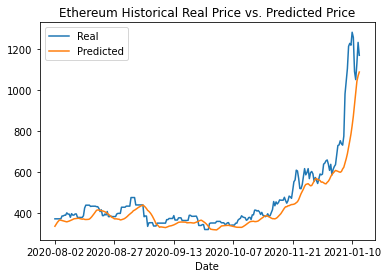

In [119]:
# Plot the real vs predicted values as a line chart
stocks.plot.line(legend=True, title="Ethereum Historical Real Price vs. Predicted Price")